***
<span style="color:#008385">
    
<font size="2.5">
    
Enoch Catuncan - Real-Time ASL Alphabet Recognition<br><p>

</font>
    
<font size="+4.3">
    
**D2 - Final Dataset**
***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi']= 100 # set the resolution to x dpi
import os
import skimage
from skimage import io

***
# D2.1: Data Collection

## Custom Dataset
***

To create my custom dataset, I used the default Windows camera app set to 1920x1080 aspect ratio and connected to a Microsoft LifeCam Studio webcam. I also used an auto clicker freeware (https://freemouseclicker.com/) to click the take picture button multiple times a second and an iPhone SE (2nd generation) flashlight for lighting.

For each letter/category:
- I collected 500 pictures each for 6 different light source directions (above, below, back, left, front, right) for a total of 3000 images
- I varied my hand position and angle for each picture

In total, I had collected 78000 images.

Below are examples of images I took for ASL letter A in different lightings:

In [ ]:
# Function to show a group of images in matrix format
def show_image_matrix(nrows, ncols, img_array, title_array, gs_array, fig_size):
    figure, subplots = plt.subplots(nrows, ncols, figsize=fig_size)
    for row in range(nrows):
        for col in range(ncols):
            subplots[row, col].title.set_text(title_array[row*ncols + col])
            if gs_array[row*ncols + col]:
                subplots[row, col].imshow(img_array[row*ncols + col], cmap='gray')
            else:
                subplots[row, col].imshow(img_array[row*ncols + col])

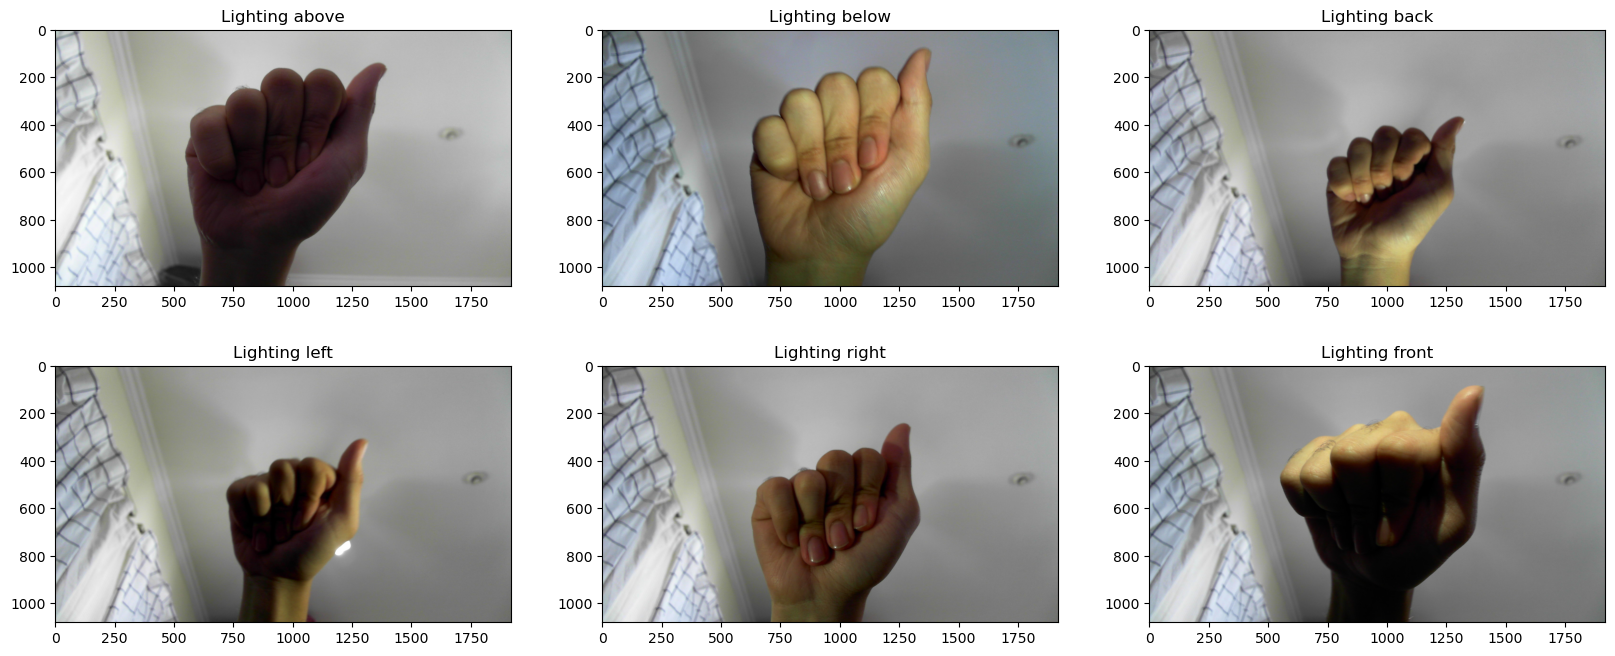

In [3]:
img_above = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_00_58_Pro (4).jpg')
img_below = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_12_05_Pro.jpg')
img_back = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_17_14_Pro (3).jpg')
img_left = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_22_44_Pro (2).jpg')
img_right = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_28_18_Pro.jpg')
img_front = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_32_26_Pro (3).jpg')

show_image_matrix(2, 3, [img_above, img_below, img_back, img_left, img_right, img_front], 
                  ['Lighting above', 'Lighting below', 'Lighting back', 'Lighting left','Lighting right', 'Lighting front'], 
                 [0, 0, 0, 0, 0, 0], (20, 8))

## Online Dataset
***

I collected an additional 7000 images for each letter, total 182000 images, from an existing dataset online compiled by user Debashish Sau on Kaggle (https://www.kaggle.com/datasets/debashishsau/aslamerican-sign-language-aplhabet-dataset). I will keep the images as is, though I will have to tweak the images in the data wrangling and feature engineering steps since the images are all in varying resolutions and there are a a lot of images.
***

# D2.2: Data Analysis

## Histograms and statistics of RGB pixel values
***
I analyzed the rgb pixel values of images from different categories to determine whether color is a good predictor or not.
***

In [4]:
img_a = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_10_49_Pro (3).jpg')
img_b = io.imread('./original_images_dataset/my_images/B/WIN_20230423_18_53_35_Pro (4).jpg')
img_c = io.imread('./original_images_dataset/my_images/C/WIN_20230423_21_02_01_Pro (4).jpg')
img_d = io.imread('./original_images_dataset/online_images/D/48599.jpg')
img_e = io.imread('./original_images_dataset/online_images/E/58599.jpg')
img_f = io.imread('./original_images_dataset/online_images/F/68599.jpg')

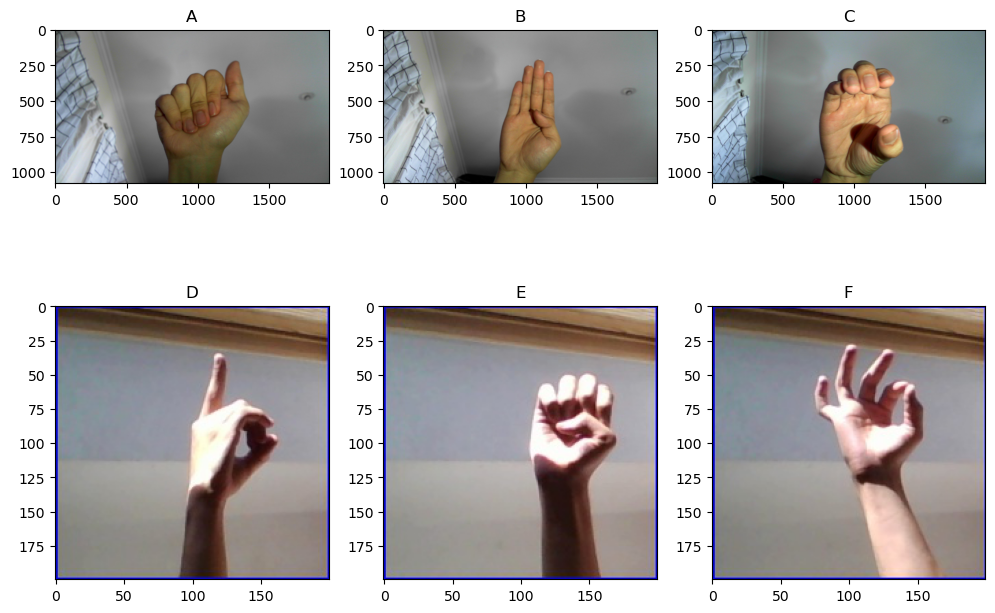

In [5]:
show_image_matrix(2, 3, [img_a, img_b, img_c, img_d, img_e, img_f], ['A', 'B', 'C', 'D','E', 'F'],
                  [0, 0, 0, 0, 0, 0], (12, 8))

***
From the image matrix, it looks as though there is some variation in the colors but this seems to be more dependent on the lighting, background and distance of the hand from the camera than the ASL letter being hand signed. 
***

In [6]:
# Function to show the RGB pixel value histograms of an image
def show_rgb_histograms(img, title):
    figure, subplots = plt.subplots(1, 4, figsize=(18, 8))
    
    subplots[0].title.set_text(title)
    subplots[0].imshow(img)

    subplots[1].set_xlabel('R pixel values')
    subplots[1].set_ylabel('G pixel values')
    subplots[1].hist2d(img[:,:,0].flatten(), img[:,:,1].flatten(), 30)
    subplots[1].imshow(img)

    subplots[2].set_xlabel('B pixel values')
    subplots[2].set_ylabel('R pixel values')
    subplots[2].hist2d(img[:,:,2].flatten(), img[:,:,0].flatten(), 30)
    subplots[2].imshow(img)

    subplots[3].set_xlabel('G pixel values')
    subplots[3].set_ylabel('B pixel values')
    subplots[3].hist2d(img[:,:,1].flatten(), img[:,:,2].flatten(), 30)
    subplots[3].imshow(img)

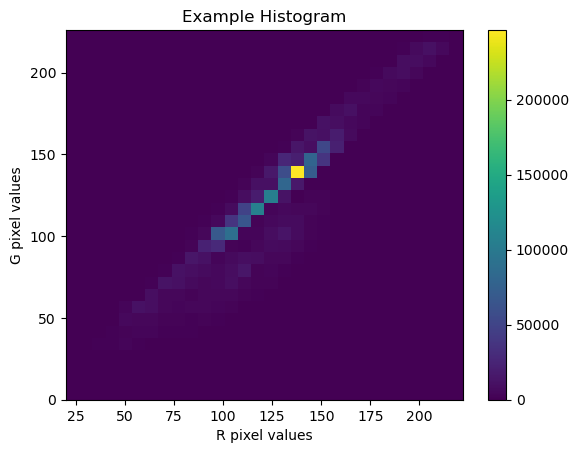

In [7]:
plt.xlabel('R pixel values')
plt.ylabel('G pixel values')
plt.title('Example Histogram')
h = plt.hist2d(img_a[:,:,0].flatten(), img_a[:,:,1].flatten(), 30)
plt.colorbar(h[3])
plt.show()

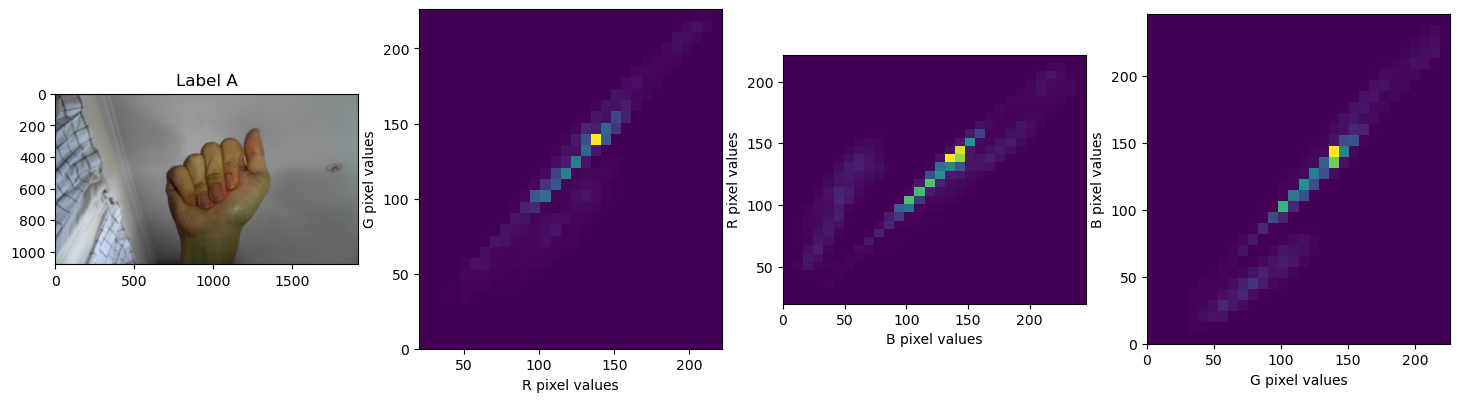

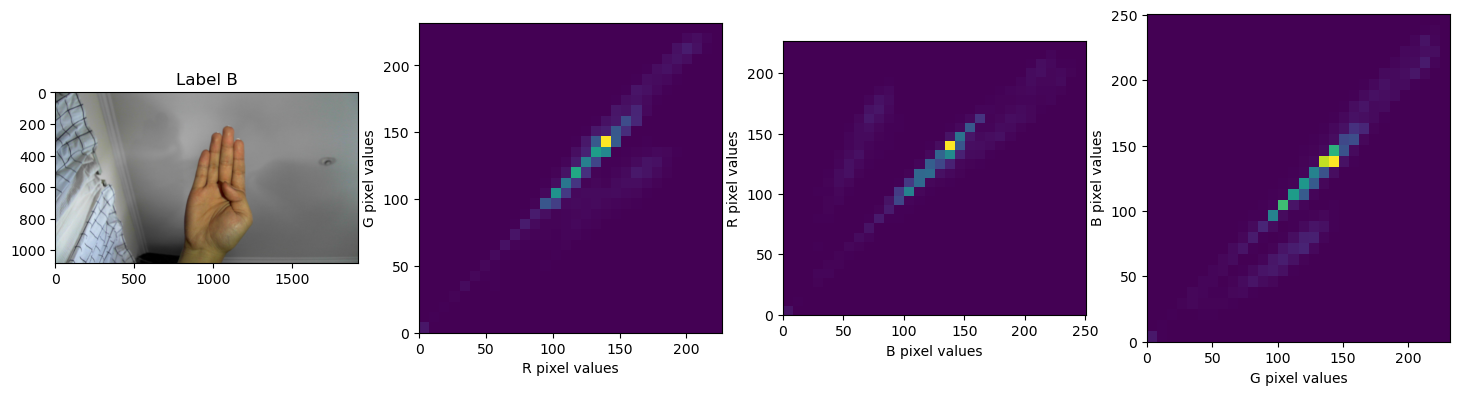

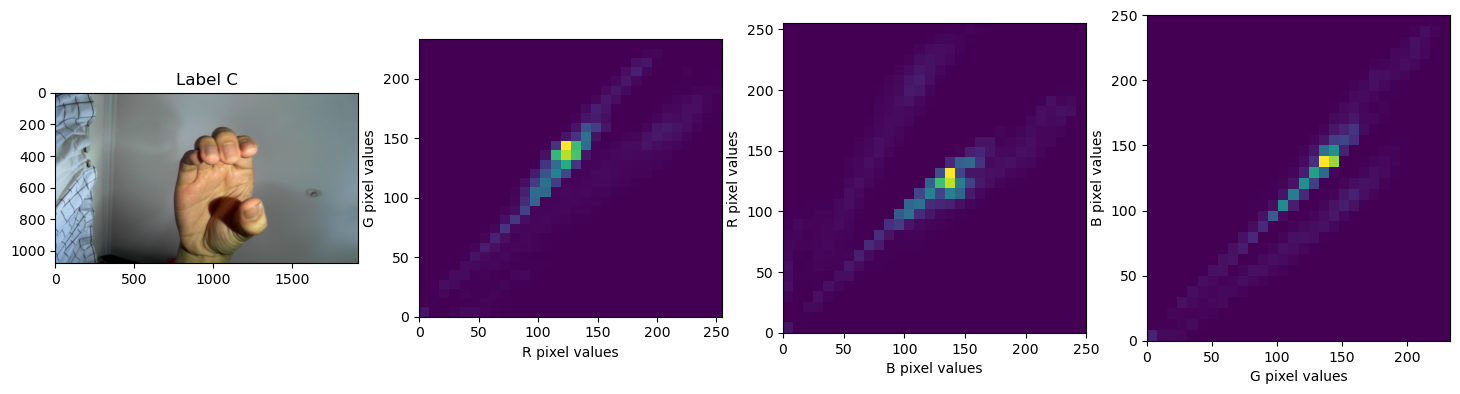

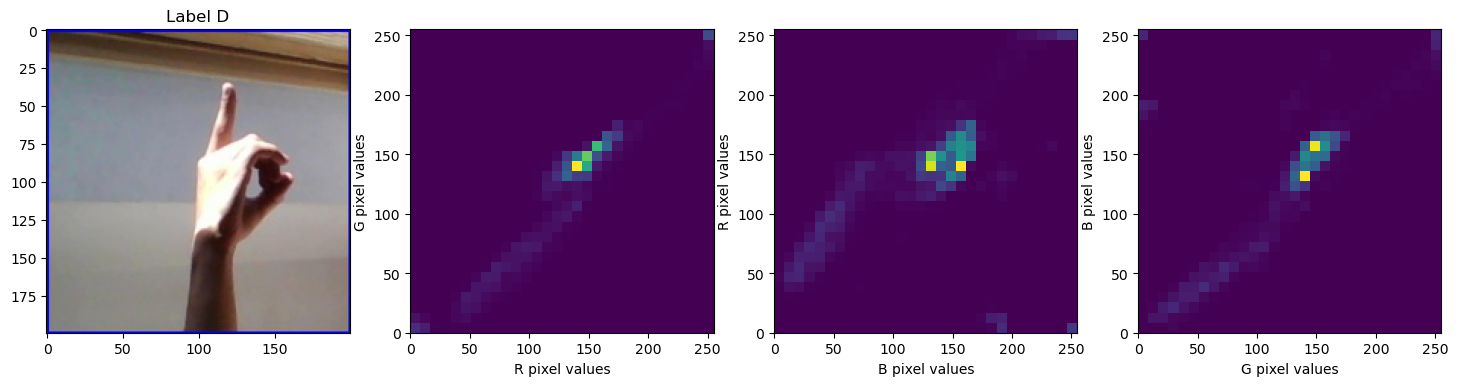

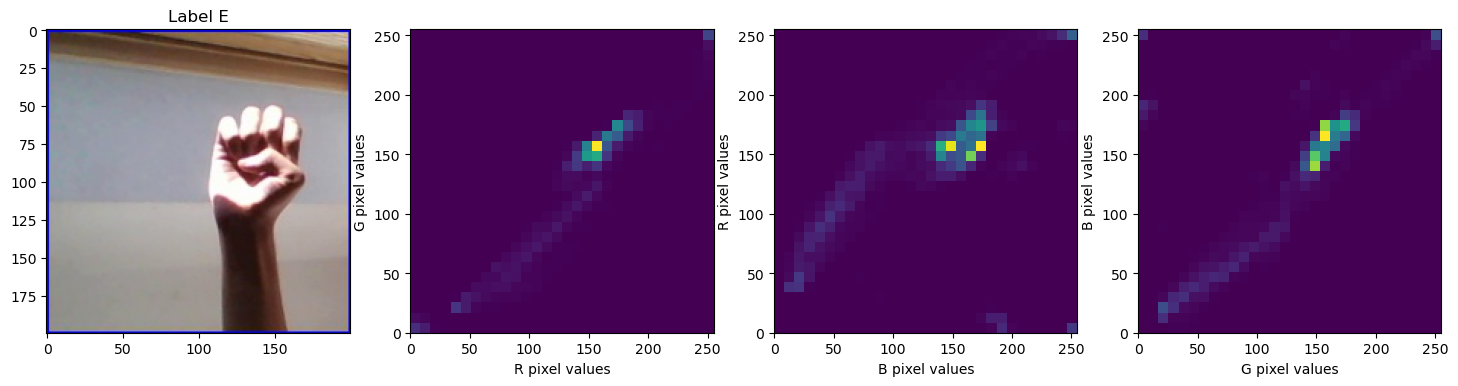

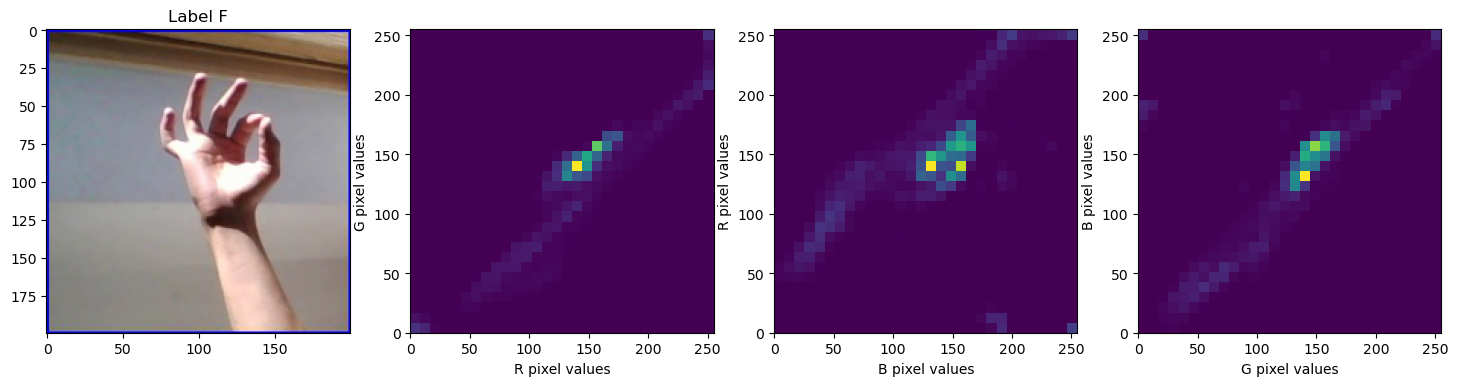

In [8]:
show_rgb_histograms(img_a, 'Label A')
show_rgb_histograms(img_b, 'Label B')
show_rgb_histograms(img_c, 'Label C')
show_rgb_histograms(img_d, 'Label D')
show_rgb_histograms(img_e, 'Label E')
show_rgb_histograms(img_f, 'Label F')

In [9]:
from scipy import stats

In [10]:
img_1 = img_a.reshape((1920*1080), 3).T
img_2 = img_b.reshape((1920*1080), 3).T
img_3 = img_c.reshape((1920*1080), 3).T
img_4 = img_d.reshape((200*200), 3).T
img_5 = img_e.reshape((200*200), 3).T
img_6 = img_f.reshape((200*200), 3).T

img1_stats = stats.describe(img_1, axis=1)
img2_stats = stats.describe(img_2, axis=1)
img3_stats = stats.describe(img_3, axis=1)
img4_stats = stats.describe(img_4, axis=1)
img5_stats = stats.describe(img_5, axis=1)
img6_stats = stats.describe(img_6, axis=1)

img1_stats_all = np.array([img1_stats.mean, img1_stats.variance,
                          img1_stats.kurtosis, img1_stats.skewness,
                          np.median(img_1, axis=1)]).flatten()
img2_stats_all = np.array([img2_stats.mean, img2_stats.variance,
                          img2_stats.kurtosis, img2_stats.skewness,
                          np.median(img_2, axis=1)]).flatten()
img3_stats_all = np.array([img3_stats.mean, img3_stats.variance,
                          img3_stats.kurtosis, img3_stats.skewness,
                          np.median(img_3, axis=1)]).flatten()
img4_stats_all = np.array([img4_stats.mean, img4_stats.variance,
                          img4_stats.kurtosis, img4_stats.skewness,
                          np.median(img_4, axis=1)]).flatten()
img5_stats_all = np.array([img5_stats.mean, img5_stats.variance,
                          img5_stats.kurtosis, img5_stats.skewness,
                          np.median(img_5, axis=1)]).flatten()
img6_stats_all = np.array([img6_stats.mean, img6_stats.variance,
                          img6_stats.kurtosis, img6_stats.skewness,
                          np.median(img_6, axis=1)]).flatten()

stats_df = pd.DataFrame([img1_stats_all, img2_stats_all, img3_stats_all, img4_stats_all, img5_stats_all, img6_stats_all],
                         columns=['R_mean', 'G_mean', 'B_mean', 'R_var', 'G_var',
                                  'B_var', 'R_kurt', 'G_kurt', 'B_kurt', 'R_skew',
                                  'G_skew', 'B_skew', 'R_med', 'G_med', 'B_med'])
stats_df

R_mean      G_mean      B_mean        R_var        G_var        B_var  \
0  124.953557  122.910495  118.382711   810.026766  1184.066754  2034.353163   
1  131.233438  128.942337  124.789340   924.724771  1092.027885  1629.027934   
2  125.035969  126.938542  122.599663  1458.259684  1298.841275  1704.179163   
3  135.298625  127.628950  131.114950  1896.514761  2346.784442  2546.877608   
4  144.817350  134.327400  138.593300  2188.809859  2787.878106  3011.648286   
5  143.706025  131.872500  135.070075  2060.242560  2128.727112  2245.533853   

     R_kurt    G_kurt    B_kurt    R_skew    G_skew    B_skew  R_med  G_med  \
0  0.855901  0.381184 -0.011475  0.011433 -0.023069 -0.224130  128.0  125.0   
1  2.177791  1.884283  0.660274 -0.473204 -0.157982 -0.073410  134.0  131.0   
2  1.521362  1.670499  1.161724  0.459236 -0.810782 -0.379188  122.0  135.0   
3  2.265480  1.058218  0.385911 -0.487769 -0.617390 -0.539168  142.0  140.0   
4  1.759110  0.447357  0.035863 -0.855875 -0.829628 -0.694494  155.0  152.0   
5  2.107404  1.153056  0.566538 -0.213014 -0.699677 -0.516914  144.0  141.0   

   B_med  
0  126.0  
1  129.0  
2  130.0  
3  144.0  
4  154.0  
5  145.0

***
The RGB pixel value histograms show massive variations between images of different categories captured in different settings and with a different person's hand but this is irrelevant to determining the ASL letter being hand signed. For images of different categories captured in the same setting with the same person's hand, the histograms are similarly distributed. Additionally, the RGB pixel value statistics show a similar result.

As expected, color doesn't seem to be a good predictor of the ASL letter as color is irrelevent to determining the ASL letter.
***

## Histograms of grayscale pixel values
***
I analyzed grayscale pixel value histograms of images from different categories to determine whether pixel intensity is a good predictor or not.
***

In [11]:
from skimage.color import rgb2gray

In [12]:
img_a_gs = rgb2gray(img_a)
img_b_gs = rgb2gray(img_b)
img_c_gs = rgb2gray(img_c)
img_d_gs = rgb2gray(img_d)
img_e_gs = rgb2gray(img_e)
img_f_gs = rgb2gray(img_f)

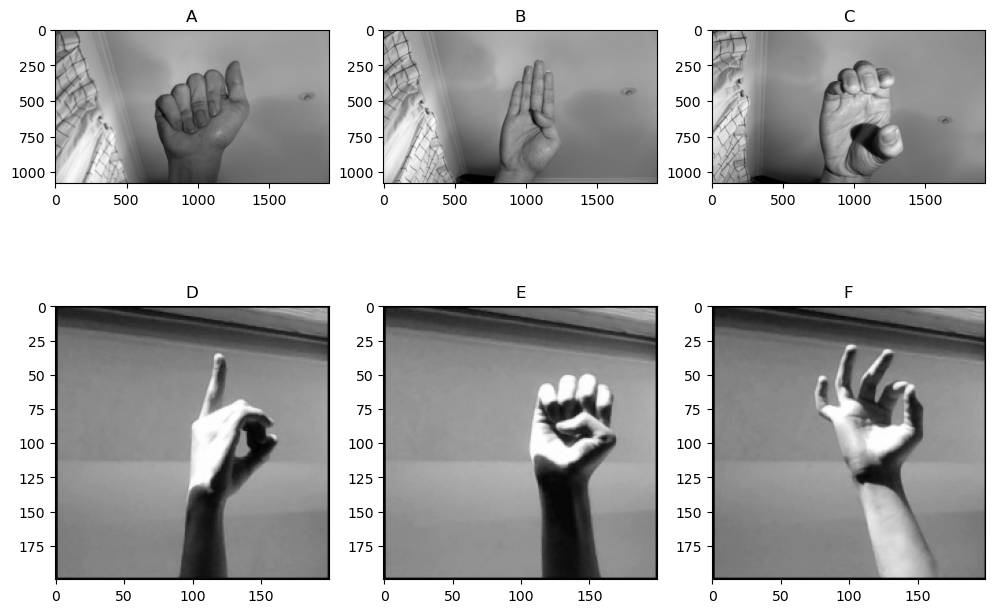

In [13]:
show_image_matrix(2, 3, [img_a_gs, img_b_gs, img_c_gs, img_d_gs, img_e_gs, img_f_gs], ['A', 'B', 'C', 'D', 'E', 'F'], 
                    [1, 1, 1, 1, 1, 1], (12, 8))

***
Similarly with color, it doesn't seem as though pixel intensity will be a good indicator as from the image matrix, it looks like lighting in the image affects pixel intensity the most and not the ASL letter.
***

In [14]:
# Function to show the grayscale pixel value histograms of an image
def show_grayscale_histograms(img, title):
    figure, subplots = plt.subplots(1, 2, figsize=(18, 8))
    subplots[0].title.set_text('Letter ' + title)
    subplots[0].imshow(img, cmap="gray")
    subplots[1].hist(img.flatten(), bins=30)

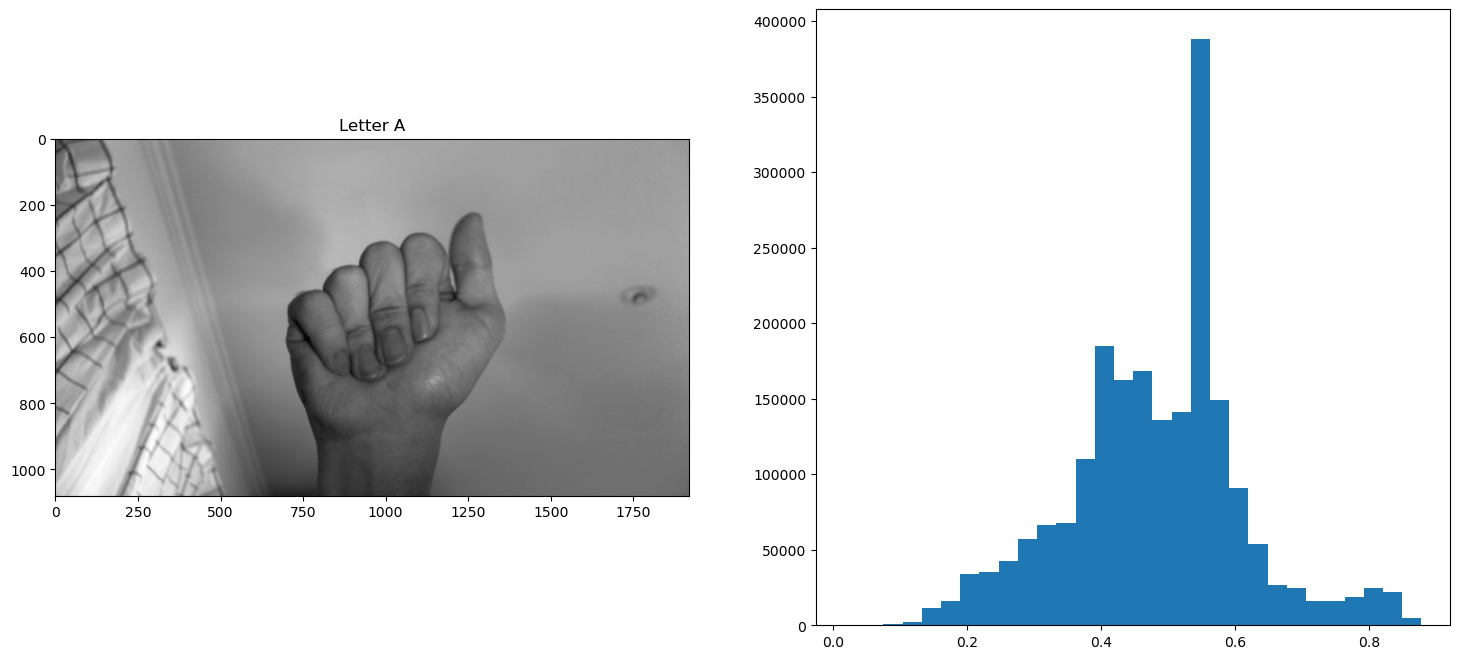

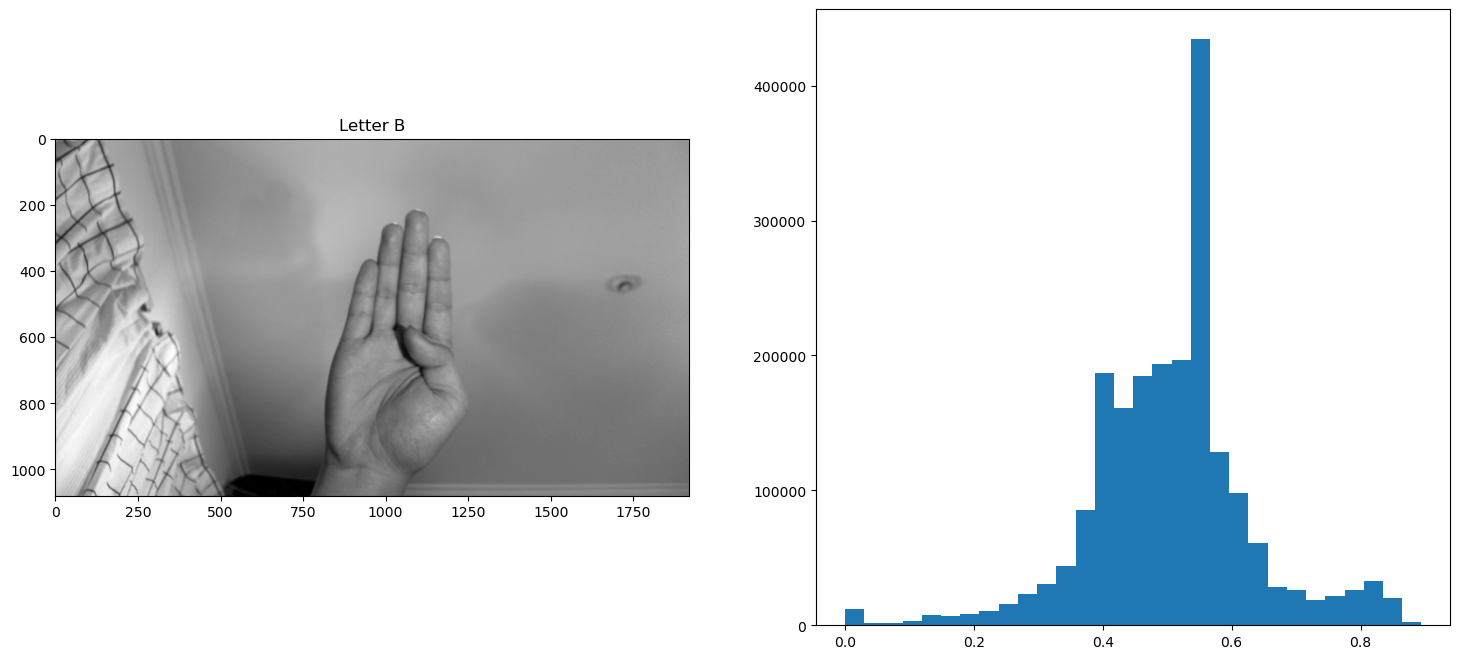

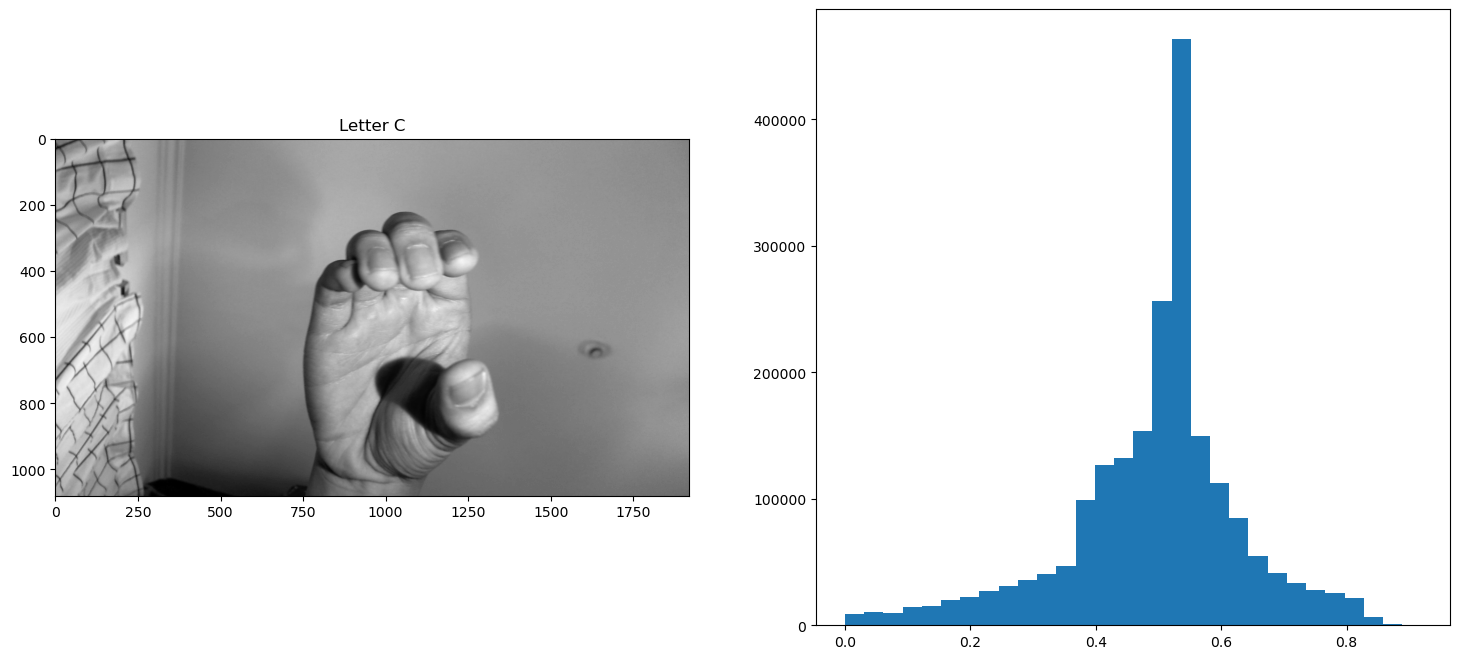

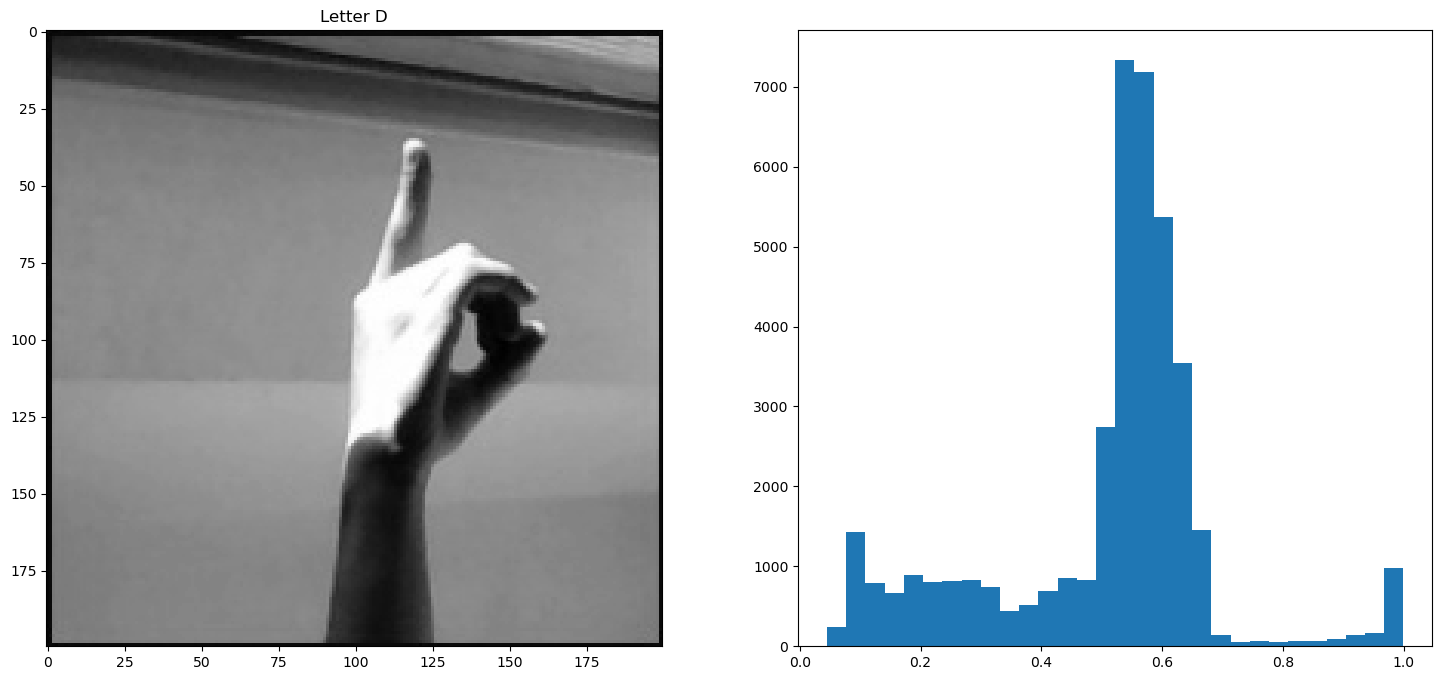

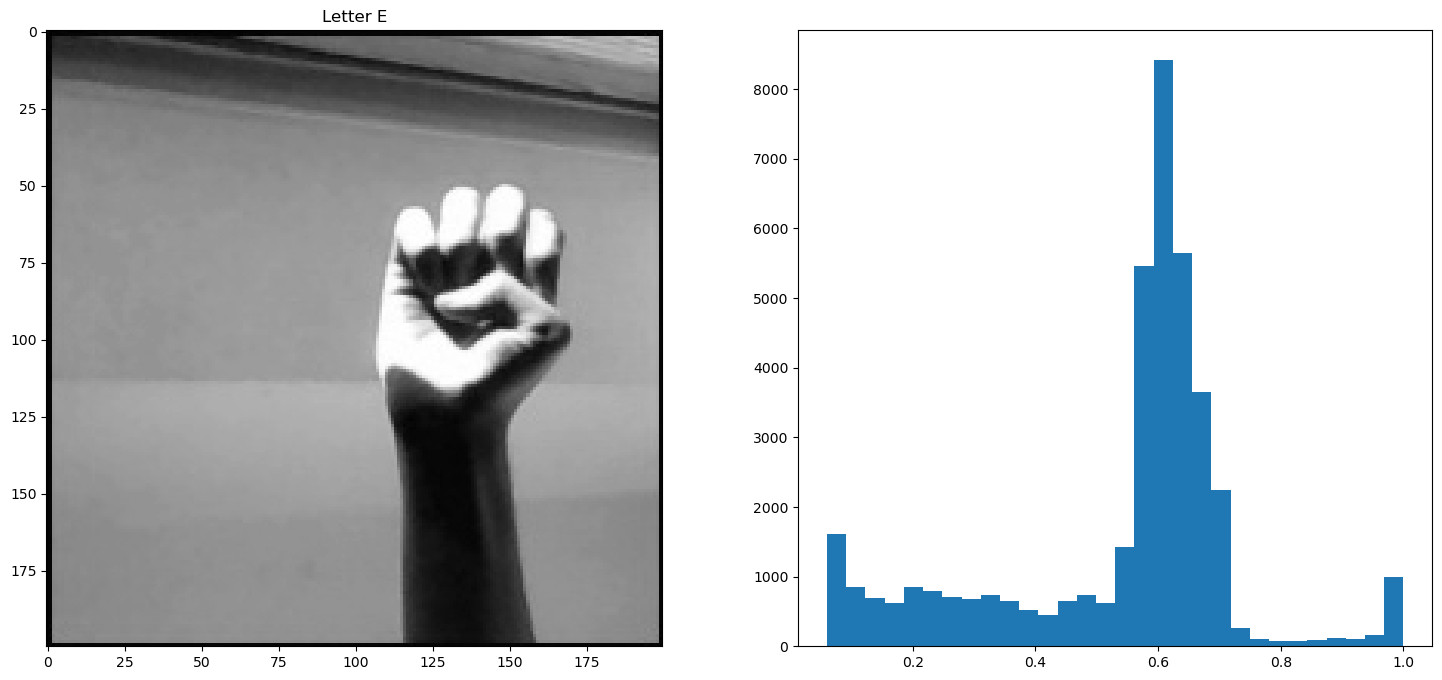

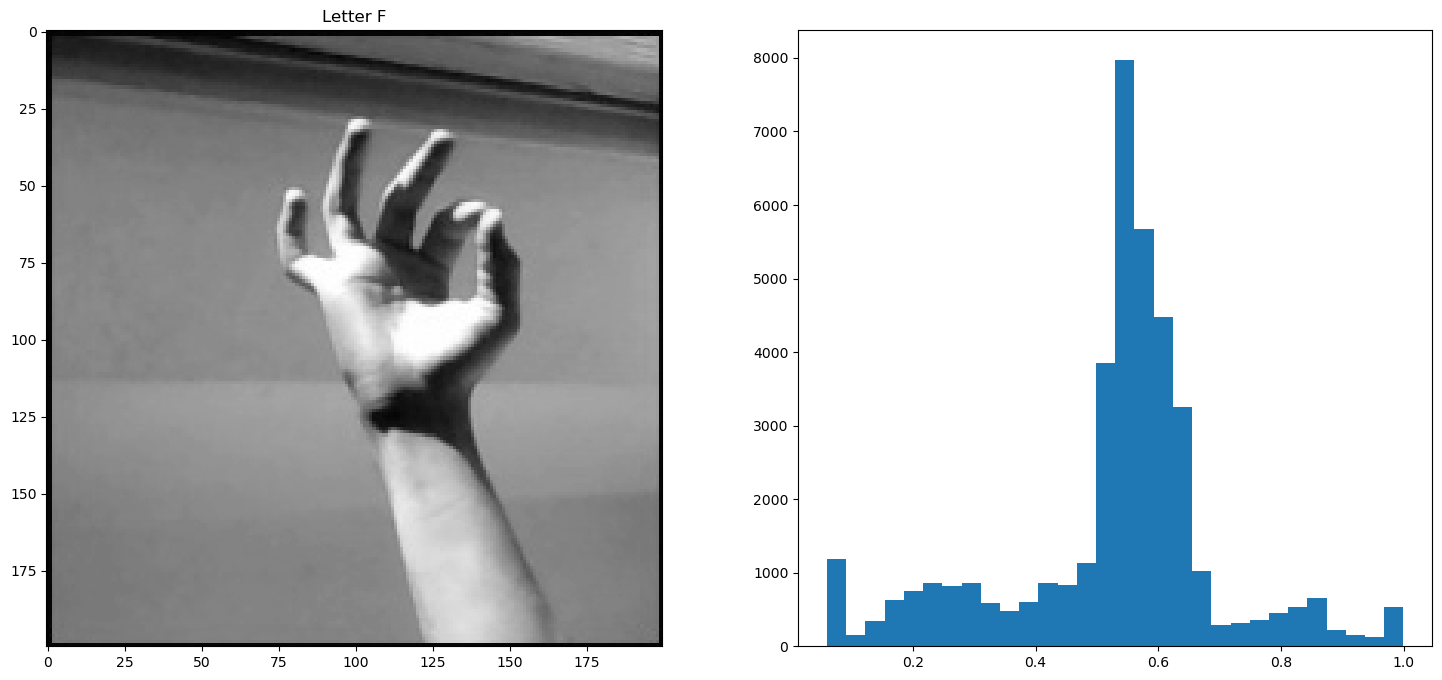

In [15]:
show_grayscale_histograms(img_a_gs, 'A')
show_grayscale_histograms(img_b_gs, 'B')
show_grayscale_histograms(img_c_gs, 'C')
show_grayscale_histograms(img_d_gs, 'D')
show_grayscale_histograms(img_e_gs, 'E')
show_grayscale_histograms(img_f_gs, 'F')

***
Similar with color, pixel intensities seem to be more affected by the environment in which the image is taken as the distribution of histograms between images taken in the same environment are similar to one another. Therefore pixel intensity isn't a good indicator. It's evident then, just by the nature of the task, that shape is the most important predictor as the shape of the hand determines which ASL letter is being hand signed.
***

# D2.3: Data Wrangling

## Combining Custom and Online Dataset
***

***
In total, there were 260000 images in the dataset with 10000 images for each letter but I encountered memory errors while using all the images which I suspected was because my dataset was too large. Therefore, I decided to cut down the number of images to a quarter of the original size using a python script. In the dataset, images using the same background, lighting and hands are bunched together (for example, for the images of letter A that I collected, the first 500 images are those with the lighting above) so I made the script only delete 3 of every 4 IDs. This is to ensure that these image "bunches" are each cut down to a quarter.
***

In [16]:
from PIL import Image
import os

# Script used to delete 3 of every 4 IDs
def delete_ids(dir):
    for filename in os.listdir(dir):
        if int(filename.split(".")[0]) % 4 == 1 or \
        int(filename.split(".")[0]) % 4 == 2 or \
        int(filename.split(".")[0]) % 4 == 3:
            os.remove(os.path.join(dir, filename))

Then, I used a python script to rename each image file.

The name IDs reserved for the images start from 10000 and ends at 74999 where there are 2500 IDs reserved for each letter. For example, IDs 10000-12499 is reserved for images corresponding to letter A, 12500-14999 for images corresponding to letter B, etc.

To label the images, a csv file with two columns, 'id' and 'class', was made, The 'id' column consists of the file names of the images and the 'class' column contains the corresponding integer label of each image. The labels go from 0 to 25 for the 26 letters. Label 0 corresponds to the letter A, label 1 corresponds to the letter B, etc.
***

In [17]:
from PIL import Image
import os

# Script used to rename the files
def rename(dir, save_dir, starting_index):
    for i, filename in enumerate(os.listdir(dir)):
        os.rename(os.path.join(save_dir, filename), 
                  os.path.join(save_dir, str(i + starting_index) + ".jpg"))

## Missing entries
***

Since this is an image classification task and the images were labelled by me, there are no NaNs in the data. So I dirtied the data by manually adding a few NaNs in the labels.csv file.
***

In [18]:
df_labels = pd.read_csv("labels.csv")

In [19]:
print("Number of NaNs in the dataset:", np.sum(pd.isnull(df_labels['class'])))

Number of NaNs in the dataset: 147


***
Since there aren't that many NaNs relative to the size of the dataset, I dropped all the rows with a NaN and saved the clean labels dataframe as 'labels_clean.csv'.
***

In [20]:
NaN_rows = df_labels[df_labels.isna().any(axis=1)]

In [21]:
df_labels = df_labels.dropna(axis=0, how='any')

In [22]:
print("Number of NaNs in the dataset:", np.sum(pd.isnull(df_labels['class'])))

Number of NaNs in the dataset: 0


In [23]:
df_labels.to_csv('labels_clean.csv')

## One hot encoding
***

The label was originally one column consisting of integers from 0 to 25 and so I one hot encoded the class column since some machine learning algorithms require it. I then saved the one hot encoded dataframe as 'labels_ohe.csv'.
***

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder = OneHotEncoder()
encoder.fit(np.array(df_labels['class']).reshape((-1,1)))
encoded_data = encoder.transform(np.array(df_labels['class']).reshape((-1,1))).toarray()

df_labels_ohe = df_labels.drop('class', axis=1)

for i, letter in enumerate(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']):
    df_labels_ohe[letter] = encoded_data[:, i]
    df_labels_ohe[letter] = df_labels_ohe[letter].astype(int)

In [26]:
df_labels_ohe

id  A  B  C  D  E  F  G  H  I  ...  Q  R  S  T  U  V  W  X  Y  Z
0      10000  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
1      10001  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
2      10002  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
3      10003  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
4      10004  1  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
...      ... .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
64995  74995  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1
64996  74996  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1
64997  74997  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1
64998  74998  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1
64999  74999  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  1

[64853 rows x 27 columns]

In [27]:
df_labels_ohe.to_csv('labels_ohe.csv')

***
# D2.4: Feature Engineering
## Complexity Reduction
***

In the custom dataset I compiled, images were in 1980x1080 resolution which I cropped to 1080x1080 using a python script to remove some of the background pixels. The image resolution was way too large and training a model would require too much computational power. Also, images from the online dataset are in varying resolutions. Therefore, I then decided to resize all the images to a much lower resolution of 256x256 using a python script.
***

In [28]:
from PIL import Image
import os

# Script used to crop 1920x1080 images to 1080x1080
def crop(dir, save_dir, starting_index):
    for i, filename in enumerate(os.listdir(dir)):
        image_path = os.path.join(dir, filename)
        img = Image.open(image_path)

        left = 420
        top = 0
        right = 1500
        bottom = 1080

        cropped_img = img.crop((left, top, right, bottom))
        cropped_img.save(os.path.join(save_dir, str(i + starting_index) + ".jpg"))

# Script used to resize the images
def resize(dir, size):
    for filename in os.listdir(dir):
        img = Image.open(os.path.join(dir, filename))
        resized_img = img.resize(size)
        resized_img.save(os.path.join(dir, filename))

In [29]:
img_a_org = io.imread('./original_images_dataset/my_images/A/WIN_20230423_18_00_48_Pro.jpg')
img_b_org = io.imread('./original_images_dataset/my_images/B/WIN_20230423_18_46_29_Pro (2).jpg')
img_c_org = io.imread('./original_images_dataset/my_images/C/WIN_20230423_20_58_40_Pro (2).jpg')
img_a_res = io.imread('./images_dataset_color/A/10000.jpg')
img_b_res = io.imread('./images_dataset_color/B/12500.jpg')
img_c_res = io.imread('./images_dataset_color/C/15000.jpg')

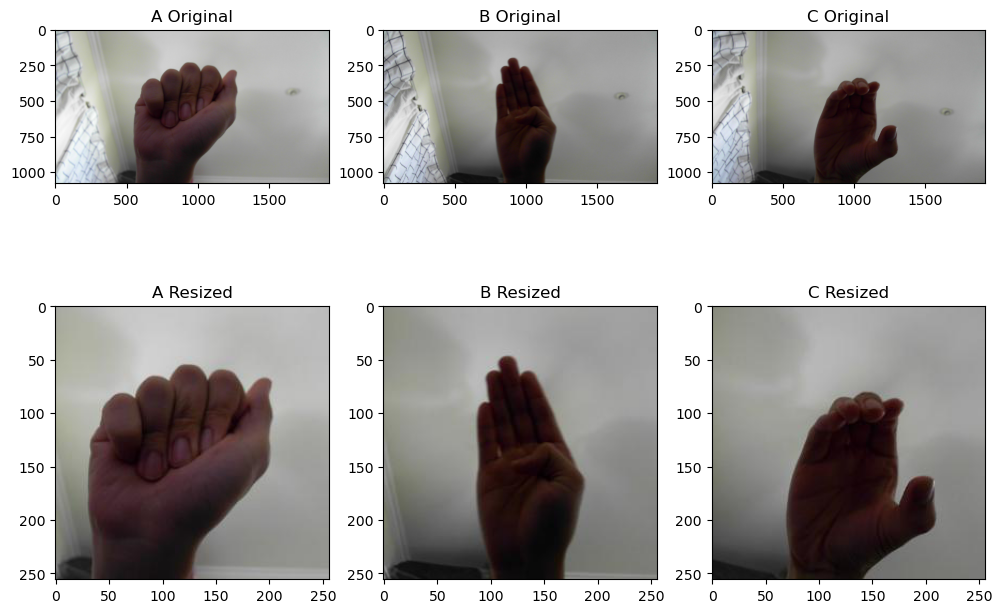

In [30]:
show_image_matrix(2, 3, [img_a_org, img_b_org, img_c_org, img_a_res, img_b_res, img_c_res], 
                  ['A Original', 'B Original', 'C Original', 'A Resized','B Resized', 'C Resized'], 
                 [0, 0, 0, 0, 0, 0], (12, 8))

***
From the data analysis stage, I found that color is not a good predictor so I converted all the images into grayscale to reduce complexity and saved the grayscaled images into the 'images_dataset_grayscale' folder using a python script.
***

In [31]:
from PIL import Image
import os

# Script used to convert images in a file to grayscale
def grayscale(dir):
    for filename in os.listdir(dir):
        img = Image.open(os.path.join(dir, filename)).convert('L')
        img.save(os.path.join(dir, filename))

In [ ]:
img_a_gs = io.imread('./images_dataset_grayscale/A/10000.jpg')
img_b_gs = io.imread('./images_dataset_grayscale/B/12500.jpg')
img_c_gs = io.imread('./images_dataset_grayscale/C/15000.jpg')

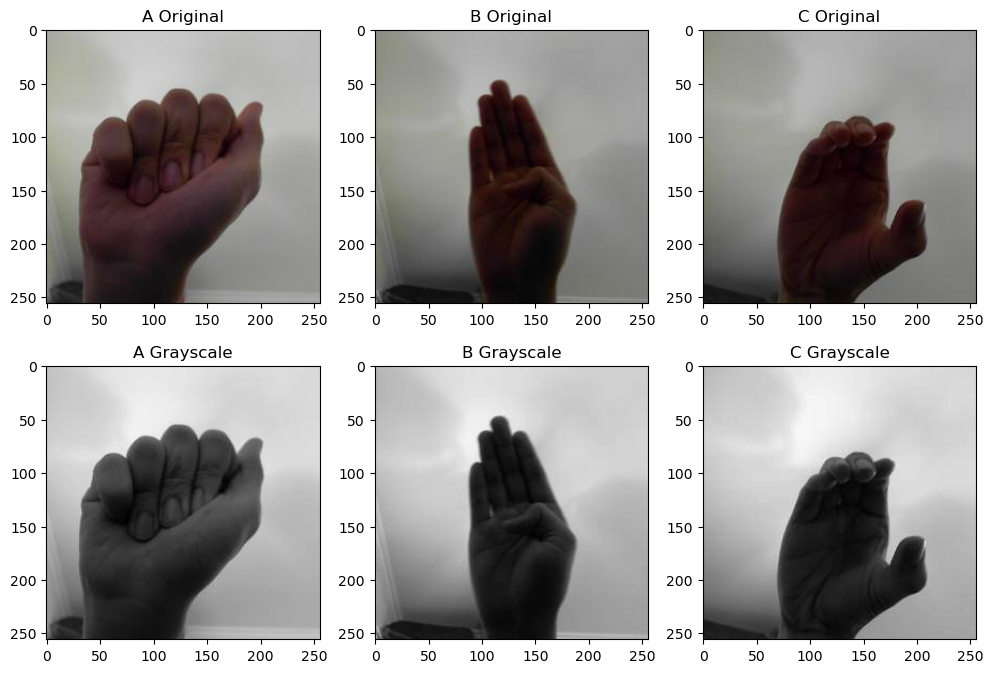

In [33]:
show_image_matrix(2, 3, [img_a_res, img_b_res, img_c_res, img_a_gs, img_b_gs, img_c_gs], 
                  ['A Original', 'B Original', 'C Original', 'A Grayscale','B Grayscale', 'C Grayscale'], 
                 [0, 0, 0, 1, 1, 1], (12, 8))

## Features Extraction - Histogram of Oriented Gradients (HOG)
***

From a human perspective, we recognize ASL alphabet letters by the shape and finger positions of the hand (For example. an A is a closed fist with the thumb at the side). So we can discern from the nature of the task, that being image recognition of ASL alphabet letters, that the shape of the hand is the most important predictor in labeling the images. Therefore, for the first iteration of my QuAM, I decided to use the sobel filter to emphasize the edges, particularly the edges of the hand, in the images and the Histogram of Oriented Gradients (HOG) feature descriptor to extract the features in the images. I use HOG since it describes the shapes within the images. These features will then be used to train a K-Nearest Neighbors (KNN) classifier.  
***

In [ ]:
from skimage import filters
from skimage.feature import hog
from skimage import exposure

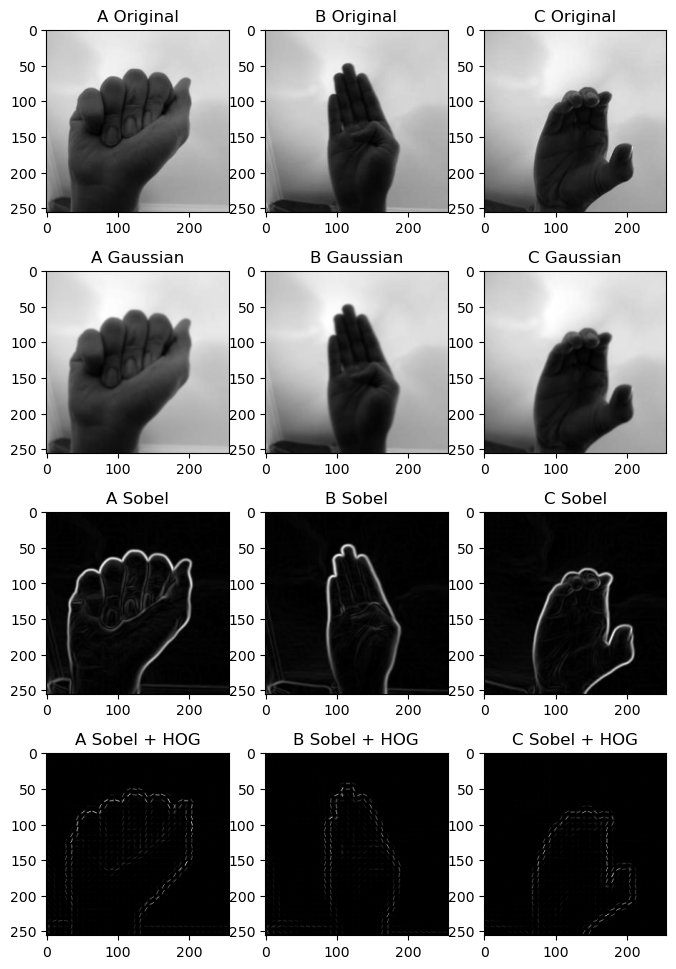

In [ ]:
img_a_sobel = filters.sobel(img_a_gs)
img_b_sobel = filters.sobel(img_b_gs)
img_c_sobel = filters.sobel(img_c_gs)
fd_img1, img_a_hog = hog(img_a_sobel, orientations=8, pixels_per_cell=(8, 8),
                      cells_per_block=(3, 3), visualize=True)
fd_img1, img_b_hog = hog(img_b_sobel, orientations=8, pixels_per_cell=(8, 8),
                      cells_per_block=(3, 3), visualize=True)
fd_img1, img_c_hog = hog(img_c_sobel, orientations=8, pixels_per_cell=(8, 8),
                      cells_per_block=(3, 3), visualize=True)

show_image_matrix(3, 3, [img_a_gs, img_b_gs, img_c_gs, img_a_sobel, img_b_sobel, img_c_sobel, img_a_hog, img_b_hog, img_c_hog], 
                  ['A Original', 'B Original', 'C Original', 'A Sobel','B Sobel', 'C Sobel', 
                   'A Sobel + HOG', 'B Sobel + HOG', 'C Sobel + HOG'], 
                 [1, 1, 1, 1, 1, 1, 1, 1, 1], (12, 12))

## Features Extraction - Convolutional Neural Network
***

Convolutional Neural Network (CNN) is also a good algorithm for image classification so I decided that I could use it for my second iteration of the QuAM to try to improve the Sobel + HOG KNN accuracy.

Since my dataset is large, I decided that I should try to use a lower number of layers which is good since my task is not too complex, as in a human can always accurately read ASL alphabet hand signs so the task likely wouldn't be too difficult for a CNN. I decided on trying four and five convolution + max pooling layers since in class we used two for the MNIST digits classification and I'd say my task is a little more complex than that. For the convolution layers, I will be using 5x5 kernel with a ReLU activation function and for the max pooling layer, a pool size of 2x2. After the convolution + pooling layers I decided to have two dense layers, same as the ones used in the MNIST digits classification; one with the ReLU activation function and the last with a softmax activation function.
***

In [36]:
import time
from time import process_time

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from keras.utils import np_utils

In [37]:
img_shape = (256, 256, 1)

CNN_model = Sequential()

CNN_model.add(Conv2D(32, kernel_size=(5, 5), input_shape=img_shape))
CNN_model.add(Activation('relu'))

CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))



CNN_model.add(Conv2D(32, kernel_size=(5, 5)))
CNN_model.add(Activation('relu'))

CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))



CNN_model.add(Conv2D(32, kernel_size=(5, 5)))
CNN_model.add(Activation('relu'))

CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))



CNN_model.add(Conv2D(32, kernel_size=(5, 5)))
CNN_model.add(Activation('relu'))

CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(Flatten())



CNN_model.add(Dense(128))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.5))



CNN_model.add(Dense(26))
CNN_model.add(Activation('softmax'))

In [38]:
CNN_model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [39]:
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      832       
                                                                 
 activation (Activation)     (None, 252, 252, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      25632     
                                                                 
 activation_1 (Activation)   (None, 122, 122, 32)      0         
                                                        